# San Francisco Housing Cost Analysis

In this assignment, you will perform fundamental analysis for the San Francisco housing market to allow potential real estate investors to choose rental investment properties.

In [2]:
# imports
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

import warnings
warnings.filterwarnings('ignore')

## Load Data

In [3]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function.

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Use the min, max, and std to scale the y limits of the chart.



In [4]:
# Calculate the mean number of housing units per year (hint: use groupby) 

avg_housing_units = sfo_data.groupby('year')['housing_units'].mean()
avg_housing_units = pd.DataFrame(avg_housing_units).reset_index()
avg_housing_units

,year,housing_units
0,2010,372560.0
1,2011,374507.0
2,2012,376454.0
3,2013,378401.0
4,2014,380348.0
5,2015,382295.0
6,2016,384242.0


In [5]:
# Save the dataframe as a csv file
avg_housing_units.to_csv('Data/avg_housing_csv.csv', index=False)

<Axes: xlabel='year'>

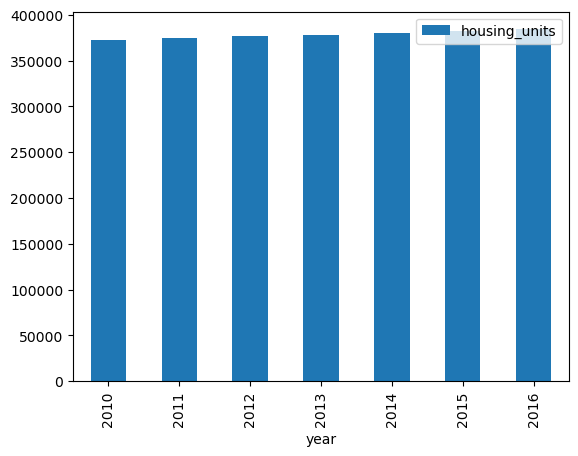

In [6]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.
avg_housing_units.plot.bar(x='year', y='housing_units')

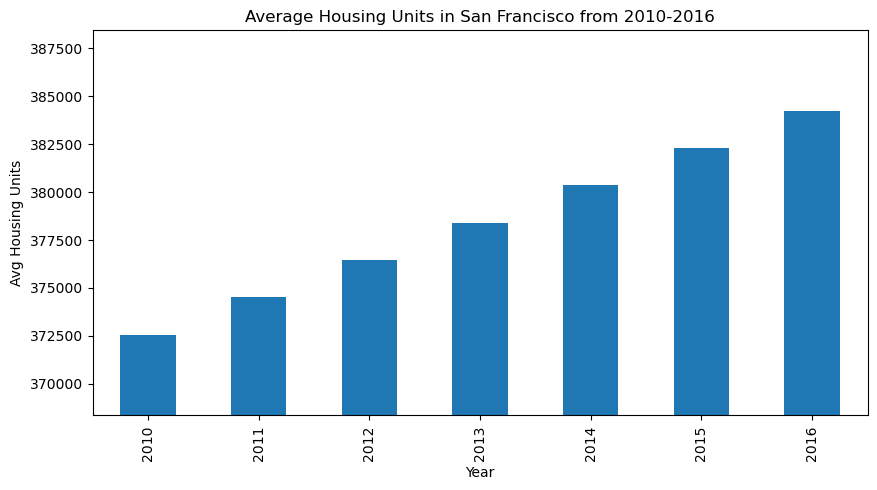

In [7]:
# Optional Challenge: Use the min, max, and std to scale the y limits of the chart

# Set plot size for better readability
min_housing_units = avg_housing_units['housing_units'].min()
max_housing_units = avg_housing_units['housing_units'].max()
std_housing_units = avg_housing_units['housing_units'].std()
plt.figure(figsize=(10, 5))

# Plotting
avg_housing_units.plot.bar(x='year', y='housing_units', title='Average Housing Units in San Francisco from 2010-2016', xlabel='Year', ylabel='Avg Housing Units', legend=False, ax=plt.gca())

# Adjust y limits based on min, max, and std
plt.ylim(min_housing_units - std_housing_units, max_housing_units + std_housing_units)

# Show plot
plt.show()

- - - 

## Average Housing Costs in San Francisco Per Year

In this section, you will calculate the average monthly rent and the average price per square foot for each year. An investor may wish to better understand the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property.  Plot the results as two line charts.

**Optional challenge:** Plot each line chart in a different color.

In [8]:
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


In [9]:
# Calculate the average sale price per square foot and average gross rent

avg_sale_price = sfo_data.groupby('year')['sale_price_sqr_foot'].mean()
avg_gross_rent = sfo_data.groupby('year')['gross_rent'].mean()

avg_sale_price_df = pd.DataFrame(avg_sale_price).reset_index()
avg_gross_rent_df = pd.DataFrame(avg_gross_rent).reset_index()

In [10]:
avg_sale_price_df.to_csv('Data/avg_sale_price_csv.csv')
avg_gross_rent_df.to_csv('Data/avg_gross_rent_csv.csv')

In [11]:
# Create two line charts, one to plot the average sale price per square foot and another for average montly rent

# Line chart for average sale price per square foot
plot_avg_sale_price = px.line(avg_sale_price_df, x='year', y='sale_price_sqr_foot')
plot_avg_sale_price.show()

In [12]:
# Line chart for average montly rent
plot_avg_gross_rent = px.line(avg_gross_rent_df, x='year', y='gross_rent')
plot_avg_gross_rent.show()

- - - 

## Average Prices by Neighborhood

In this section, you'll create a function named average_price_by_neighborhood to analyze and visualize the housing market trends in a specific San Francisco neighborhood. First, it filters housing data for the chosen neighborhood. Then, it cleans the data, ensuring sale prices are numeric and removes any missing values. Next, it calculates the yearly average sale price per square foot. Finally, it generates a line plot displaying this trend over time. The function will use Plotly Express for visualization, emphasizing clarity with labeled axes and a descriptive title. Upon calling this function with a neighborhood's name, it will return the trend plot. The same steps will be followed to analyze average gross rent trends.

In [13]:
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


In [14]:
"""
Write a function that: 
- Calculates the average sale price per square foot for a given neighborhood in San Francisco,
- Filters the data for the specified neighborhood,
- Cleans and processes the data,
- Calculates the average price per square foot for each year,
- Creates a line plot to visualize the trend over the years.
"""

def average_price_by_neighborhood(neighborhood):
    df_prices = sfo_data[sfo_data['neighborhood'] == neighborhood]   
    # Convert 'sale_price_sqr_foot' to a numeric type, ignore errors to avoid conversion issues
    df_prices['sale_price_sqr_foot'] = pd.to_numeric(df_prices['sale_price_sqr_foot'], errors='coerce')
    # Drop rows with NaN values in 'sale_price_sqr_foot' after conversion
    df_prices = df_prices.dropna(subset=['sale_price_sqr_foot'])
    # Group by 'year' and calculate mean, ensuring 'sale_price_sqr_foot' is now numeric
    df_avg_prices = df_prices.groupby('year')['sale_price_sqr_foot'].mean()
    df_avg_prices = pd.DataFrame(df_avg_prices).reset_index()
    # Create and return the plot
    df_avg_prices_plot = px.line(df_avg_prices, x='year', y='sale_price_sqr_foot')
    df_avg_prices_plot.show()

In [15]:
# Test your function by passing a neighborhood name.
average_price_by_neighborhood('Bayview')
average_price_by_neighborhood("Alamo Square")
average_price_by_neighborhood('Central Richmond')

In [16]:
# Use plotly to create an interactive line chart of the average monthly rent.
# def average_rent_by_neighborhood(neighborhood):

    # Convert 'gross_rent' to a numeric type, ignore errors to avoid conversion issues

    # Drop rows with NaN values in 'gross_rent' after conversion

    # Group by 'year' and calculate mean, ensuring 'gross_rent' is now numeric

    # Create and return the plot

In [17]:
def average_rent_by_neighborhood(neighborhood):
    df_rent = sfo_data[sfo_data['neighborhood'] == neighborhood]
    # Convert 'sale_price_sqr_foot' to a numeric type, ignore errors to avoid conversion issues
    df_rent['gross_rent'] = pd.to_numeric(df_rent['gross_rent'], errors='coerce')
    # Drop rows with NaN values in 'sale_price_sqr_foot' after conversion
    df_rent = df_rent.dropna(subset=['gross_rent'])
    # Group by 'year' and calculate mean, ensuring 'sale_price_sqr_foot' is now numeric
    df_avg_rent = df_rent.groupby('year')['gross_rent'].mean()
    df_avg_rent = pd.DataFrame(df_avg_rent).reset_index()
    # Create and return the plot
    df_avg_rent_plot = px.line(df_avg_rent, x='year', y='gross_rent')
    df_avg_rent_plot.show()

In [18]:
average_rent_by_neighborhood('Bayview')
average_rent_by_neighborhood("Alamo Square")

## The Top 10 Most Expensive Neighborhoods

In this section, you will Group by year and neighborhood and then create a new dataframe of the mean values to calculate the mean sale price per square foot for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [19]:
# Getting the data from the top 10 expensive neighborhoods to own

avg_neighborhood_price = sfo_data.groupby('neighborhood')['sale_price_sqr_foot'].mean()
avg_neighborhood_df = pd.to_numeric(avg_neighborhood_price, errors='coerce')
avg_neighborhood_df = pd.DataFrame(avg_neighborhood_price).reset_index()
avg_neighborhood_df

,neighborhood,sale_price_sqr_foot
0,Alamo Square,366.020712
1,Anza Vista,373.382198
2,Bayview,204.588623
3,Bayview Heights,590.792839
4,Bernal Heights,576.746488
...,...,...
68,West Portal,498.488485
69,Western Addition,307.562201
70,Westwood Highlands,533.703935
71,Westwood Park,687.087575


In [20]:
top_10_exp_neighborhoods = avg_neighborhood_df.sort_values(by='sale_price_sqr_foot', ascending=False).head(10)
top_10_exp_neighborhoods

,neighborhood,sale_price_sqr_foot
65,Union Square District,903.993258
36,Merced Heights,788.844818
38,Miraloma Park,779.810842
51,Pacific Heights,689.555817
71,Westwood Park,687.087575
63,Telegraph Hill,676.506578
57,Presidio Heights,675.350212
10,Cow Hollow,665.964042
56,Potrero Hill,662.013613
60,South Beach,650.124479


In [21]:
# Plotting the data from the top 10 expensive neighborhoods
top_10_bar = px.bar(top_10_exp_neighborhoods, x='neighborhood', y='sale_price_sqr_foot', title='Top 10 Most Expensive Neighborhoods in San Francisco')

top_10_bar.update_layout(
    xaxis_title='San Francisco Neighborhood',
    yaxis_title='Sale Price per Square Foot'
)

# Show the plot
top_10_bar.show()

- - - 

## Comparing cost to purchase versus rental income

In this section, you will define a function that takes a selected neighborhood as input, filters the data for that neighborhood, creates a bar chart using Plotly Express, and returns the chart as a result.

In [22]:
"""
Write a function that: 
- creates a new DataFrame called df_costs containing only the rows from the DataFrame "sfo_data"
- generates a plotly bar chart comparing the sale_price_sqr_foot and gross_rent
columns.
- sets the barmode parameter to 'group'
- returns the plot
"""
def most_expensive_neighborhoods_rent_sales(selected_neighborhood):
    df_costs = sfo_data[sfo_data['neighborhood'] == selected_neighborhood]
    df_costs_bar = px.bar(df_costs, x=df_costs.index, 
                          y=['sale_price_sqr_foot', 'gross_rent'], 
                          title='Comparison of Sale Price per Square Foot and Gross Rent',
                          labels={"value": "USD", "variable": "Metrics"},
                          barmode='group')
    return df_costs_bar

most_expensive_neighborhoods_rent_sales('Alamo Square')

In [23]:
# testing the function

most_expensive_neighborhoods_rent_sales('Bayview')

- - - 

## Neighborhood Map

In this section, you will read in neighborhoods location data and build an interactive map with the average house value per neighborhood. Use a `scatter_mapbox` from Plotly express to create the visualization. 

### Load Location Data

In [24]:
# Load neighborhoods coordinates data
neighborhood_coords = pd.read_csv('Data/neighborhoods_coordinates.csv')

neighborhood_coords.head()

,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


### Data Preparation

You will need to join the location data with the mean values per neighborhood.

1. Calculate the mean values for each neighborhood.

2. Join the average values with the neighborhood locations.

In [25]:
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


In [26]:
# Calculate the mean values for each neighborhood
neighborhood_avg = sfo_data.groupby(by='neighborhood').mean().reset_index()
neighborhood_avg.rename(columns={'neighborhood': 'Neighborhood', 'gross_rent': 'Gross Rent'}, inplace=True)
neighborhood_avg.head()

,Neighborhood,sale_price_sqr_foot,housing_units,Gross Rent
0,Alamo Square,366.020712,378401.0,2817.285714
1,Anza Vista,373.382198,379050.0,3031.833333
2,Bayview,204.588623,376454.0,2318.400000
3,Bayview Heights,590.792839,382295.0,3739.000000
4,Bernal Heights,576.746488,379374.5,3080.333333


In [27]:
# Join the average values with the neighborhood locations
neighborhood_map_data = pd.merge(neighborhood_avg, neighborhood_coords, on='Neighborhood')
neighborhood_map_data.head()

,Neighborhood,sale_price_sqr_foot,housing_units,Gross Rent,Lat,Lon
0,Alamo Square,366.020712,378401.0,2817.285714,37.791012,-122.402100
1,Anza Vista,373.382198,379050.0,3031.833333,37.779598,-122.443451
2,Bayview,204.588623,376454.0,2318.400000,37.734670,-122.401060
3,Bayview Heights,590.792839,382295.0,3739.000000,37.728740,-122.410980
4,Buena Vista Park,452.680591,378076.5,2698.833333,37.768160,-122.439330


### Mapbox Visualization

Plot the average values per neighborhood using a Plotly express `scatter_mapbox` visualization.

In [28]:
# Create a scatter mapbox to analyze neighborhood info
sfo_map = px.scatter_mapbox(neighborhood_map_data, lat='Lat', lon='Lon', 
                            size='sale_price_sqr_foot', color='Gross Rent',
                            zoom=11, height=600, hover_data=['Neighborhood'])
sfo_map.update_layout(mapbox_style="carto-positron")

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to create visualizations that investors can use to interactively filter and explore various factors related to the house value of the San Francisco's neighborhoods. 

### Create a DataFrame showing the most expensive neighborhoods in San Francisco by year

In [56]:
df_costs = sfo_data.groupby([sfo_data.index, "neighborhood"]).mean()
df_costs.reset_index(inplace=True)
df_costs.rename(columns={"level_0": "year"}, inplace=True)

df_costs.head()

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560.0,1239.0
1,2010,Anza Vista,267.932583,372560.0,1239.0
2,2010,Bayview,170.098665,372560.0,1239.0
3,2010,Buena Vista Park,347.394919,372560.0,1239.0
4,2010,Central Richmond,319.027623,372560.0,1239.0


In [50]:
# Fetch the data from all expensive neighborhoods per year.
df_expensive_neighborhoods = sfo_data.groupby(by="neighborhood").mean()
df_expensive_neighborhoods = df_expensive_neighborhoods.sort_values(by="sale_price_sqr_foot", ascending=False).head(10)
df_expensive_neighborhoods = df_expensive_neighborhoods.reset_index()

In [51]:
df_expensive_neighborhoods.head(10)

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Union Square District,903.993258,377427.50,2555.166667
1,Merced Heights,788.844818,380348.00,3414.000000
2,Miraloma Park,779.810842,375967.25,2155.250000
3,Pacific Heights,689.555817,378401.00,2817.285714
4,Westwood Park,687.087575,382295.00,3959.000000
5,Telegraph Hill,676.506578,378401.00,2817.285714
6,Presidio Heights,675.350212,378401.00,2817.285714
7,Cow Hollow,665.964042,378401.00,2817.285714
8,Potrero Hill,662.013613,378401.00,2817.285714
9,South Beach,650.124479,375805.00,2099.000000


In [55]:
df_expensive_neighborhoods_per_year = df_costs[df_costs["neighborhood"].isin(df_expensive_neighborhoods["neighborhood"])]
df_expensive_neighborhoods_per_year

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
7,2010,Cow Hollow,569.379968,372560.0,1239.0
31,2010,Miraloma Park,680.608729,372560.0,1239.0
41,2010,Pacific Heights,496.516014,372560.0,1239.0
46,2010,Potrero Hill,491.450004,372560.0,1239.0
47,2010,Presidio Heights,549.417931,372560.0,1239.0
49,2010,South Beach,1037.099789,372560.0,1239.0
52,2010,Telegraph Hill,524.793509,372560.0,1239.0
54,2010,Union Square District,569.193448,372560.0,1239.0
67,2011,Cow Hollow,390.595653,374507.0,1530.0
89,2011,Miraloma Park,414.676065,374507.0,1530.0


### Create a parallel coordinates plot and parallel categories plot of most expensive neighborhoods in San Francisco per year


In [47]:
# Parallel Categories Plot

In [46]:
# Parallel Coordinates Plot

### Create a sunburst chart to conduct a costs analysis of most expensive neighborhoods in San Francisco per year

In [66]:
# Sunburst Plot
px.sunburst(df_expensive_neighborhoods_per_year, path=['year', 'neighborhood'], values='sale_price_sqr_foot', color='gross_rent', height=600, title="Cost Analysis of Most Expensive Neighborhoods in San Francisco")